In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smapi ## to implement linnear regression using stat model (apart from sklearn)
from sklearn.datasets import load_iris 
from sklearn.datasets import load_boston ## importing boston housing price dataset from sklearn
from sklearn.cross_validation import train_test_split ## to split the data into training and testing data 
from sklearn.linear_model import LinearRegression ## to call the linnear model ## it means from sklearn module import linear model
## and from linear model import the LinnearRegression function 
import numpy as np ## to do any maths 
from sklearn import metrics
import seaborn as sns
from IPython.display import Image

ModuleNotFoundError: No module named 'sklearn.cross_validation'

###### https://youtu.be/3ZWuPVWq7p4?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A
######   https://www.youtube.com/watch?v=NUXdtN1W1FE

In [3]:
## Read CSV File
df_demographic = pd.read_csv('DemographicData.csv',index_col=0)
    

In [56]:
print(os.getcwd())
# to get the working directory

C:\Users\kumrajni\Jupyter Learnign


In [4]:
## renaming columns because it is with spaces
df_demographic.rename(columns={'Country Code':'Country_Code','Birth rate':'Birth_rate',
                      'Internet users':'Internet_users','Income Group':'Income_Group'},inplace=True)
df_demographic.index.rename('Country_Name',inplace=True)
 #df_demographic.loc['Aruba']


In [49]:
## add or delete a column
df_demographic['Dummy'] = df_demographic['Birth_rate']*2
df_demographic.drop('Dummy',axis=1,inplace=True)

In [5]:
df_demographic

,Country_Code,Birth_rate,Internet_users,Income_Group
Country_Name,,,,
Aruba,ABW,10.244,78.90000,High income
Afghanistan,AFG,35.253,5.90000,Low income
Angola,AGO,45.985,19.10000,Upper middle income
Albania,ALB,12.877,57.20000,Upper middle income
United Arab Emirates,ARE,11.044,88.00000,High income
Argentina,ARG,17.716,59.90000,High income
Armenia,ARM,13.308,41.90000,Lower middle income
Antigua and Barbuda,ATG,16.447,63.40000,High income
Australia,AUS,13.200,83.00000,High income


In [4]:
## data cleansing
## to know the count of na 
df_demographic.isnull().sum()

Country_Code      0
Birth_rate        1
Internet_users    4
Income_Group      3
dtype: int64

In [6]:
## drop where all columns are 'na'
df_demographic=df_demographic.dropna(how='all')
df_demographic


,Country_Code,Birth_rate,Internet_users,Income_Group
Country_Name,,,,
Aruba,ABW,10.244,78.90000,High income
Afghanistan,AFG,35.253,5.90000,Low income
Angola,AGO,45.985,19.10000,Upper middle income
Albania,ALB,12.877,57.20000,Upper middle income
United Arab Emirates,ARE,11.044,88.00000,High income
Argentina,ARG,17.716,59.90000,High income
Armenia,ARM,13.308,41.90000,Lower middle income
Antigua and Barbuda,ATG,16.447,63.40000,High income
Australia,AUS,13.200,83.00000,High income


In [11]:
## fill Na with any value to columns
df_New = df_demographic.fillna(
{
    'Country_Code':'NA',
    'Birth_rate':0,
    'Internet_users':0,
    'Income_Group':'NA'
})
df_New


,Country_Code,Birth_rate,Internet_users,Income_Group
Country_Name,,,,
Aruba,ABW,10.244,78.90000,High income
Afghanistan,AFG,35.253,5.90000,Low income
Angola,AGO,45.985,19.10000,Upper middle income
Albania,ALB,12.877,57.20000,Upper middle income
United Arab Emirates,ARE,11.044,88.00000,High income
Argentina,ARG,17.716,59.90000,High income
Armenia,ARM,13.308,41.90000,Lower middle income
Antigua and Barbuda,ATG,16.447,63.40000,High income
Australia,AUS,13.200,83.00000,High income


In [13]:
## fill Na with bfill and ffill method
df_new_fill = df_demographic.fillna(method="ffill")
df_new_fill

,Country_Code,Birth_rate,Internet_users,Income_Group
Country_Name,,,,
Aruba,ABW,10.244,78.90000,High income
Afghanistan,AFG,35.253,5.90000,Low income
Angola,AGO,45.985,19.10000,Upper middle income
Albania,ALB,12.877,57.20000,Upper middle income
United Arab Emirates,ARE,11.044,88.00000,High income
Argentina,ARG,17.716,59.90000,High income
Armenia,ARM,13.308,41.90000,Lower middle income
Antigua and Barbuda,ATG,16.447,63.40000,High income
Australia,AUS,13.200,83.00000,High income


In [17]:
## interpolate
df_interpole = df_demographic.interpolate()
df_interpolate

,Country_Code,Birth_rate,Internet_users,Income_Group
Country_Name,,,,
Aruba,ABW,10.2440,78.90000,High income
Afghanistan,AFG,35.2530,5.90000,Low income
Angola,AGO,45.9850,19.10000,Upper middle income
Albania,ALB,12.8770,57.20000,Upper middle income
United Arab Emirates,ARE,11.0440,88.00000,High income
Argentina,ARG,17.7160,59.90000,High income
Armenia,ARM,13.3080,41.90000,Lower middle income
Antigua and Barbuda,ATG,16.4470,63.40000,High income
Australia,AUS,13.2000,83.00000,High income


In [32]:
## drop na 
df_demographic=df_demographic.dropna(how='any')
df_demographic[df_demographic.Country_Code=='IND']

,Country_Code,Birth_rate,Internet_users,Income_Group
Country_Name,,,,
India,IND,20.291,15.1,Lower middle income


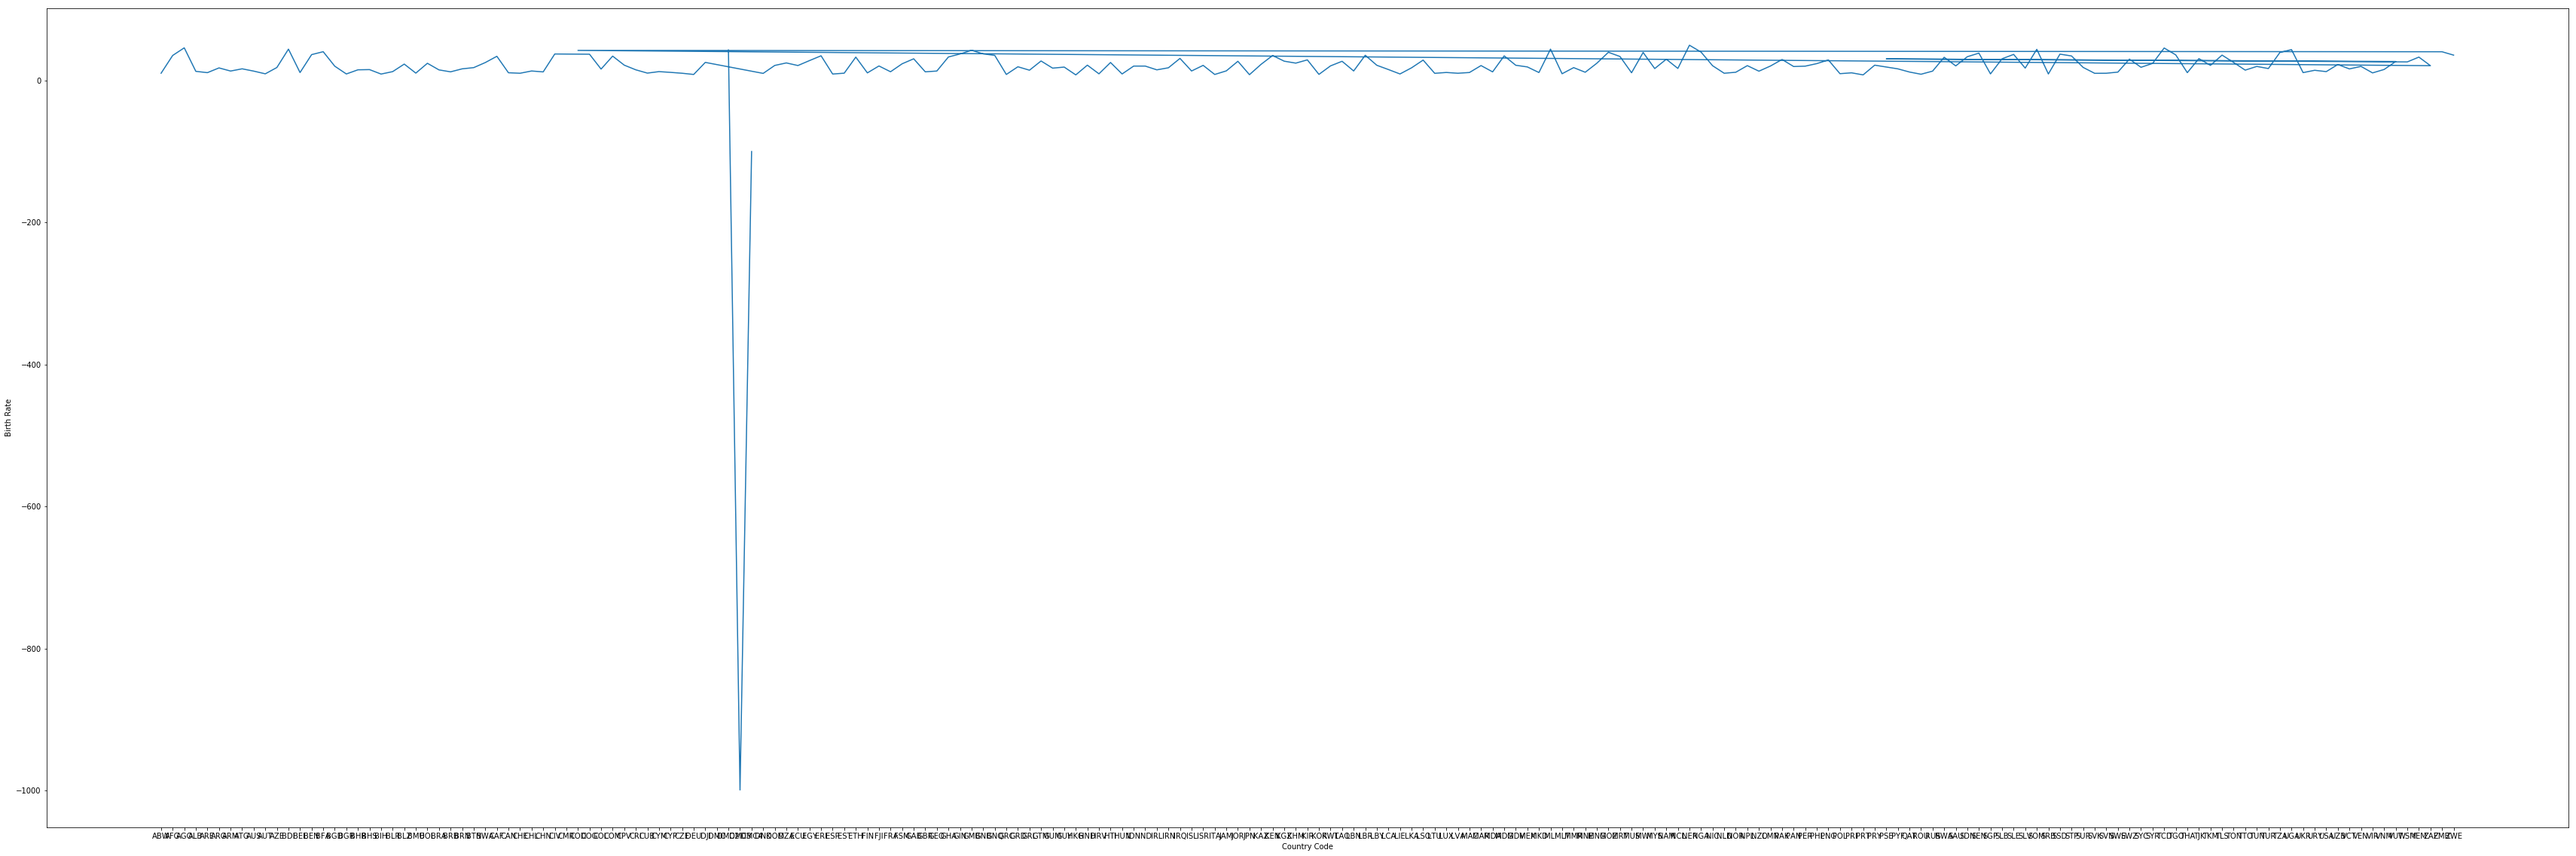

In [13]:
## plt.rcParams['figure.figsize'] = [60,20]
plt.plot(df_demographic['Country_Code'],df_demographic['Birth_rate'])
plt.xlabel('Country Code')
plt.ylabel('Birth Rate')
plt.show()

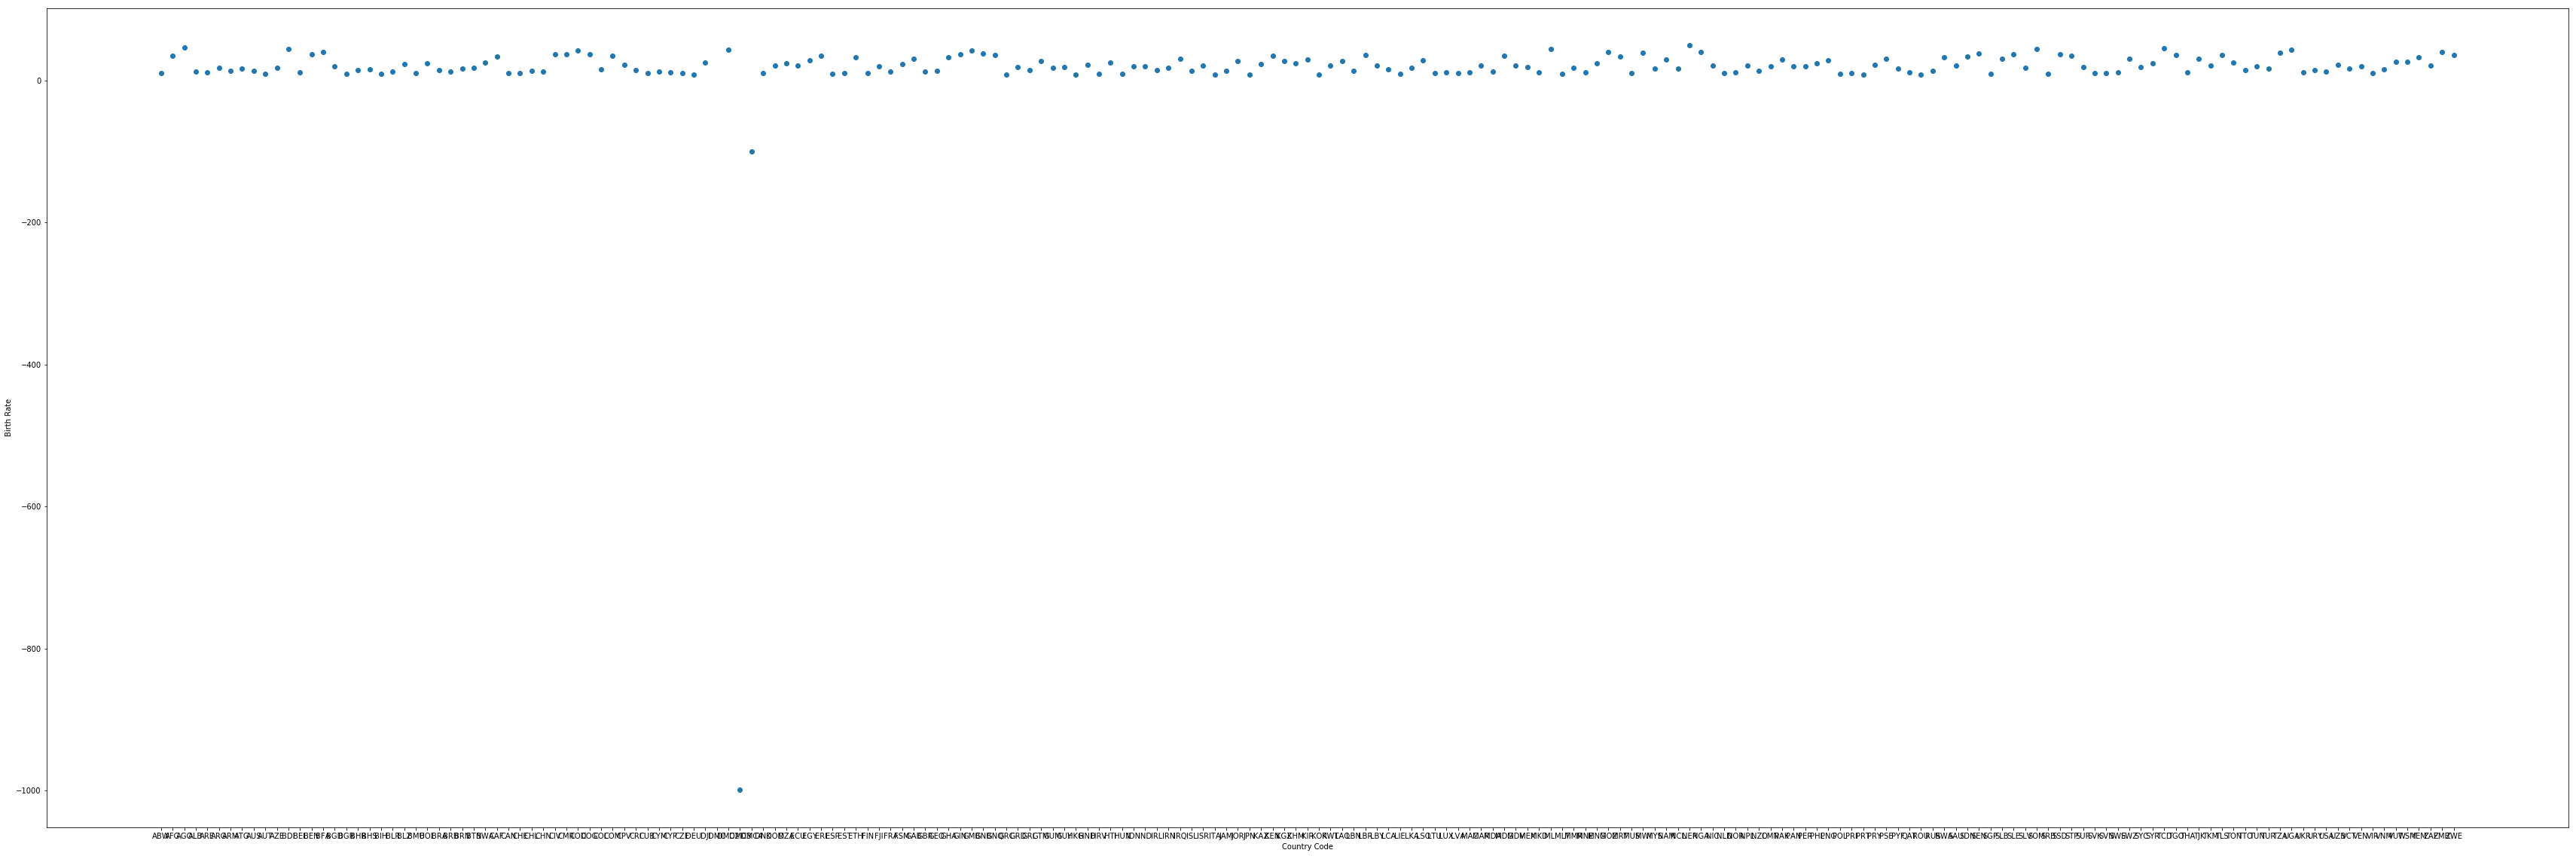

In [24]:
## plt.rcParams['figure.figsize'] = [60,20]
plt.scatter(df_demographic['Country_Code'],df_demographic['Birth_rate'])
plt.xlabel('Country Code')
plt.ylabel('Birth Rate')
plt.show()
plt.savefig('Birth_Rate.png',dpi=200)

# Linear vs Non-Linear regresion graph

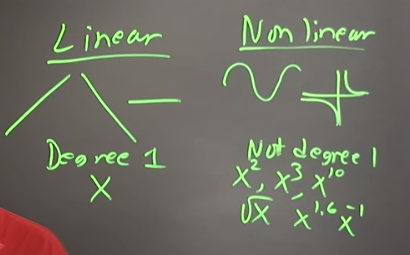

In [4]:
Image(filename="linear_non_linear.png", width=700,height=400)

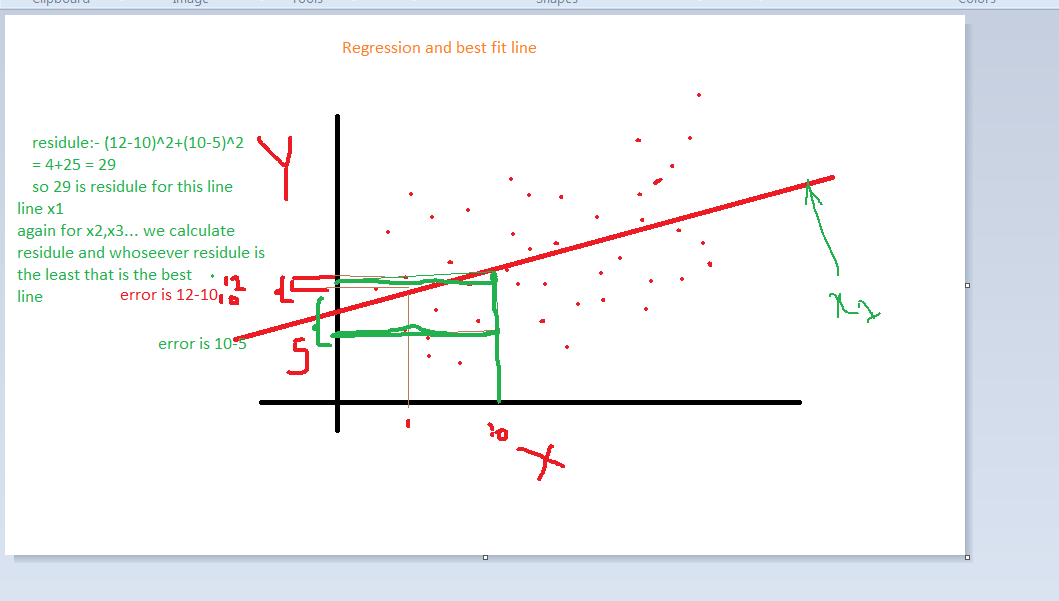

In [5]:
Image(filename="BestFIT_line.png", width=700,height=400)

# model complexity
model complexity means that how many features our model is based on
what is the degree of the equation ....
in general we use many feature in order to build our model and thus those feature 
may intriduce complexity in model equation 

# overfitting
overfitting means that we have build a model and its accuracy is very high(99%) but how we achieved this accuracy
is by adjusting our model with train data so much that it became of high accuracy 
but then when we apply this model to the real life data it falls on its face
that is termed as overfitting

# Linear regression example 1

In [27]:
## linnera regression of df_demographic 
## linear depelndability means if you draw graph between x and y it will be any thing like of straight line 
## using stat model
## note we use stat model for more of a analytical purpose meaning to analize the data and the feature(dimensions)
## to calculate the p value and to find out the dimesnion is significant or not
## just for learning we are trying to find out the relation between birth rate and internet user.
## we are using ordinary least square value its an approch to perform linnear regression in python
lm = smapi.ols(formula="Birth_rate~Internet_users",data=df_demographic).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Birth_rate   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     383.4
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           9.77e-48
Time:                        18:58:05   Log-Likelihood:                -629.98
No. Observations:                 195   AIC:                             1264.
Df Residuals:                     193   BIC:                             1270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         34.0066      0.777     43.756      0.000      32.474      35.539
Internet_users    -0.2979      0.015    -19.582      0.000      -0.328      -0.268
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.079
Skew:                           0.156   Prob(JB):                        0.583
Kurtosis:                       3.187   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

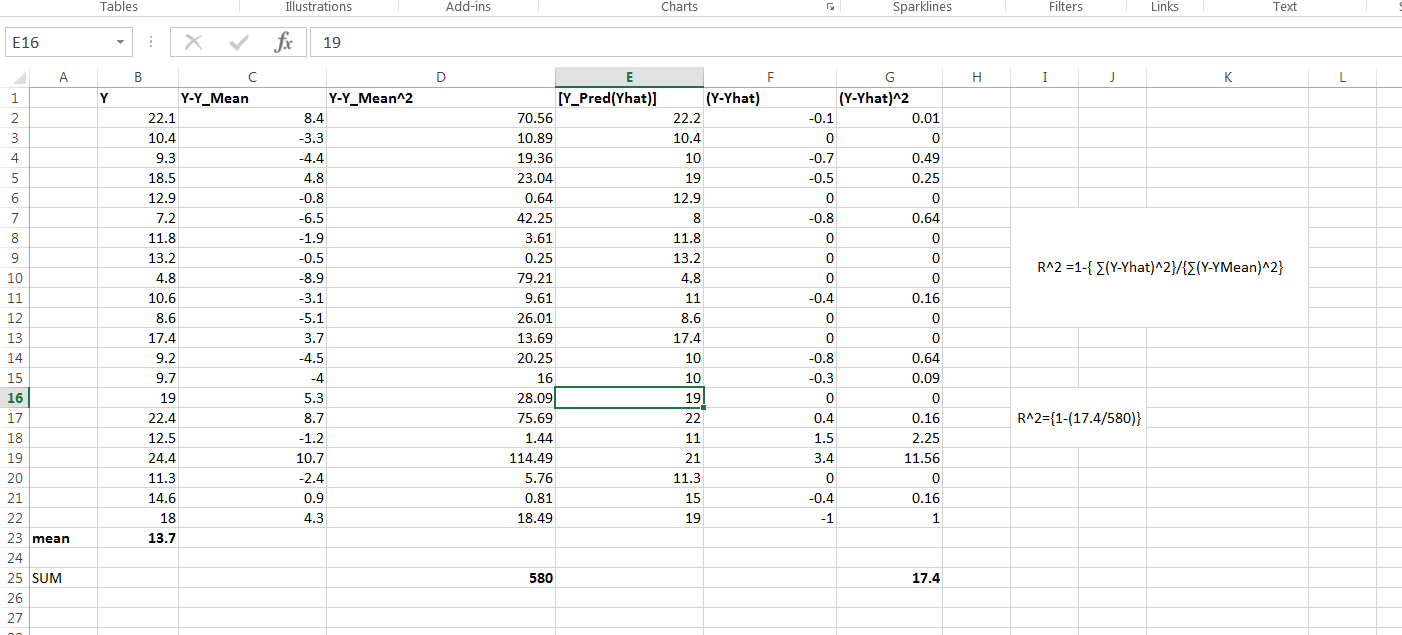

In [1]:
## R-square of 0.663 means that 66% of change in birth rate can be explained with that of internet_user
from IPython.display import Image
## <img src="R-Square.png", width=20,height=20>
Image(filename="R-Square.png", width=700,height=400)
## note that we substract 1-() because normarlly (y-ypred) means how much it is deviating from the origional
## and hence its the distance and means we couldn't presict and if we substract 1-(coildn't predict) we will
## get what we can predict



In [232]:
## CALCUALTING r-squarE FOR FUN :D
y_test.iloc[5]
I_input = []
for i in range(y_test.size):
    (I_input.append(y_test.iloc[i]))
print(I_input)
print(ypred)
I_input_Mean = np.mean(I_input)
print(I_input_Mean)
print(np.mean(ypred))
##print(type(I_input))
##print(type(list(ypred)))
##print(np.size(I_input)==ypred.size)
y_minus_y_bar_square = np.square(I_input-I_input_Mean)
print(y_minus_y_bar_square)

y_pre_minus_y_pred_mean_square = np.square(ypred-np.mean(ypred))
print(y_pre_minus_y_pred_mean_square)
sum_y_square=0
for i in range(y_minus_y_bar_square.size):
    sum_y_square = sum_y_square+y_minus_y_bar_square[i]
    
print(sum_y_square)
sum_ypred_square=0
for i in range(y_pre_minus_y_pred_mean_square.size):
    sum_ypred_square = sum_ypred_square+y_pre_minus_y_pred_mean_square[i]
print(sum_ypred_square)
R_SQUARE = 1-(sum_ypred_square/sum_y_square)
print(R_SQUARE)




[23.800000000000001, 16.600000000000001, 9.5, 14.800000000000001, 17.600000000000001, 25.5, 16.899999999999999, 12.9, 10.5, 17.100000000000001, 14.5, 11.300000000000001, 17.399999999999999, 16.699999999999999, 13.4, 15.9, 12.9, 12.800000000000001, 9.5, 18.399999999999999, 10.699999999999999, 12.5, 8.5, 11.5, 11.9, 14.9, 10.1, 18.899999999999999, 19.600000000000001, 15.9, 23.199999999999999, 11.9, 17.300000000000001, 11.699999999999999, 20.199999999999999, 15.5, 11.5, 11.0, 22.300000000000001, 7.5999999999999996, 5.2999999999999998, 8.6999999999999993, 6.7000000000000002, 19.0, 5.5, 14.6, 14.6, 21.5, 22.600000000000001, 19.699999999999999]
[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268 

In [229]:
## p value significance 
 ## we take the dimension into consideration of pur model if we have a p-value (alpha<-><0.05)
## p value means the how likely the dimension is significant in our calculation
## taht significance comes by determinig the p-value of that dimension 
## p value means the probablity of obtainign the extreme y value if that dimension is varied or changed 
## why we take 0.05 as the p value because its probability and we takle base as 95% of the variance 
## can be explained with x only (0.05*100) (5%) will not be expalined 


In [12]:
Iris = load_iris()
## print(Iris.feature_names) features_name are the columns in the sample  
print(Iris.target)
print(Iris.target_names)
print(Iris.data.shape)
print(Iris.target.shape)
## Store features matrix in x
x = Iris.data
## Store target response in y
y = Iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
(150, 4)
(150,)


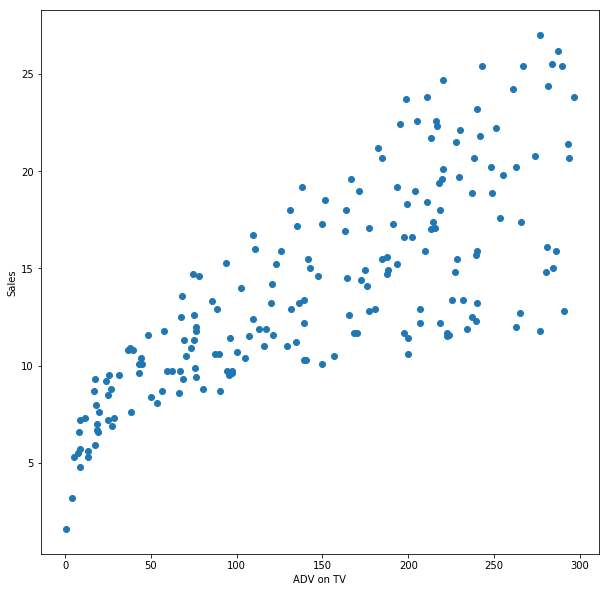

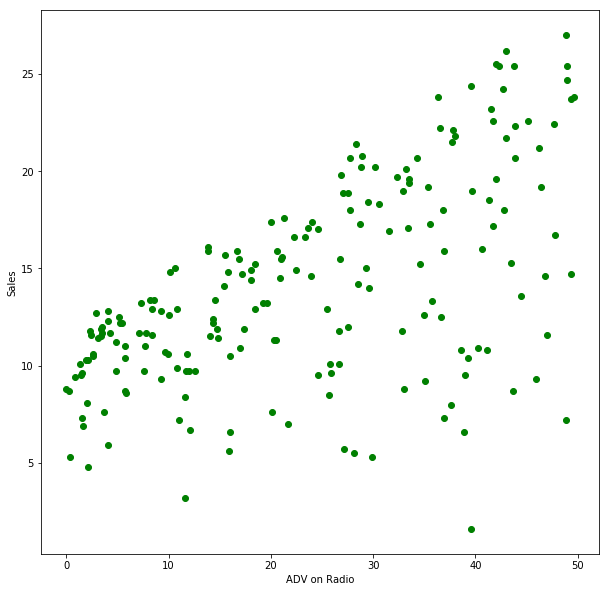

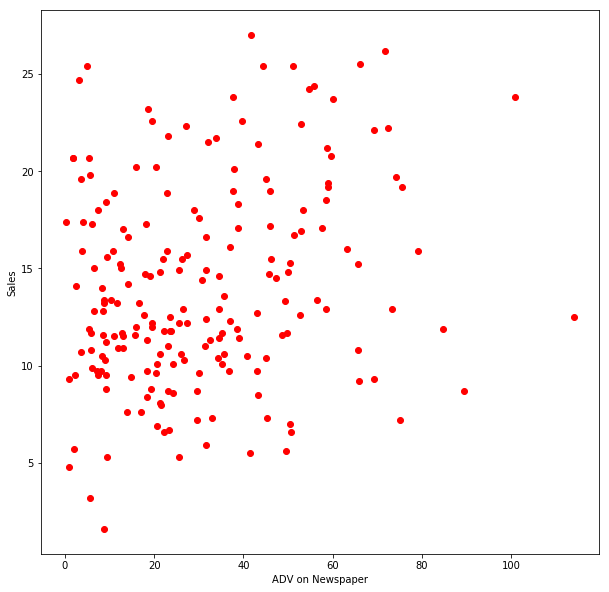

In [59]:
## linnear regression 
## plotting the y vs all x to analize first
data = pd.read_excel('adv.xlsx',header=0)
## data.shape
data.columns
## in linnear regression we first want to visualize the data, like
## how is the relation between independent variable and dependent variables
## in matplot save before showing the fig 
## to set the image size set the figure_size before plotting the figure :)
plt.figure(figsize=(10,10))
plt.scatter(data.TV,data.Sales,label="test",)
plt.xlabel("ADV on TV")
plt.ylabel("Sales")
plt.savefig("Sales_AdvTV.png")
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(data.Radio,data.Sales,c="green",label="Sample")
plt.xlabel("ADV on Radio")
plt.ylabel("Sales")
plt.show()
plt.figure(figsize=(10,10))
plt.scatter(data.Newspaper,data.Sales,c="red")
plt.xlabel("ADV on Newspaper")
plt.ylabel("Sales")
plt.show()

In [90]:
## linnear regression 
## defining x(input) and y(output) for putting it into algorithm
## for linnear regression remember that y should be of series of numpy
## we import  the model
## we instantiate the model
## we FIT the model
## we predict the next set of input or we feed the model
X = data[["TV","Radio","Newspaper"]]
print(X.head())
y = data['Sales']
print(y.head())
print(type(y))
## splitting the data into train and test
## if we dont define the ration in train_test_split then it is ging to split 25% of data for testing
## random_state=1( or any value ) means everytime we run the numbers will be generate same 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
X_train.head()



      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


,TV,Radio,Newspaper
99,289.7,42.3,51.2
124,123.1,34.6,12.4
120,19.4,16.0,22.3
54,182.6,46.2,58.7
34,265.6,20.0,0.3


In [100]:
## instantiate the mode
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(linreg.coef_)
print(linreg.intercept_)
## prediction 
ypred = linreg.predict(X_test)
## RMSE root mean square error is the error squared (in order to punish the big difference)
## we calculate RMSE as if  ^y->(10,50,20,30) is predicted and in testY(10,30,40,20) was there then 
## RMSE will be sqrt[1/n{(y-^y)^2}]
###  sqrt[1/4(10-10)^2+(30-50)^2+(40-20)^2+(20-30)^2]
### 

[ 0.04656457  0.17915812  0.00345046]
2.87696662232


In [103]:
print(np.sqrt(metrics.mean_squared_error(y_test,ypred))) 
## the root mean square error is something we want to reduce so when we have less value of this the better we are

1.40465142303


In [134]:
## querying data frame 
## print(data[data.Sales.isin(y_test)])
## 59	210.8	49.6	37.7	23.8
ypred

        TV  Radio  Newspaper  Sales
5    180.8   10.8       58.4   12.9
12   214.7   24.0        4.0   17.4
15   204.1   32.9       46.0   19.0
17    67.8   36.6      114.0   12.5
19    69.2   20.5       18.3   11.3
20   147.3   23.9       19.1   14.6
22   237.4    5.1       23.5   12.5
24   228.3   16.9       26.2   15.5
28   240.1   16.7       22.9   15.9
29   248.8   27.1       22.9   18.9
30    70.6   16.0       40.8   10.5
32   112.9   17.4       38.6   11.9
34   265.6   20.0        0.3   17.4
35    95.7    1.4        7.4    9.5
36   290.7    4.1        8.5   12.8
39    43.1   26.7       35.1   10.1
40   228.0   37.7       32.0   21.5
41   202.5   22.3       31.6   16.6
42   177.0   33.4       38.7   17.1
44   206.9    8.4       26.4   12.9
45    25.1   25.7       43.3    8.5
46   175.1   22.5       31.5   14.9
48   239.9   41.5       18.5   23.2
49   227.2   15.8       49.9   14.8
52   100.4    9.6        3.6   10.7
53   216.4   41.7       39.6   22.6
55   262.7   28.8       15.9

array([ 21.70910292,  16.41055243,   7.60955058,  17.80769552,
        18.6146359 ,  23.83573998,  16.32488681,  13.43225536,
         9.17173403,  17.333853  ,  14.44479482,   9.83511973,
        17.18797614,  16.73086831,  15.05529391,  15.61434433,
        12.42541574,  17.17716376,  11.08827566,  18.00537501,
         9.28438889,  12.98458458,   8.79950614,  10.42382499,
        11.3846456 ,  14.98082512,   9.78853268,  19.39643187,
        18.18099936,  17.12807566,  21.54670213,  14.69809481,
        16.24641438,  12.32114579,  19.92422501,  15.32498602,
        13.88726522,  10.03162255,  20.93105915,   7.44936831,
         3.64695761,   7.22020178,   5.9962782 ,  18.43381853,
         8.39408045,  14.08371047,  15.02195699,  20.35836418,
        20.57036347,  19.60636679])

# linear regression example 2 50 start up

In [261]:
## Linnear regression of 50_startup to find out the profit dependability 
data_strt_up = pd.read_csv('C:\\Users\\kumrajni\\Downloads\\Analytics\\R-DS\\50-Startups.csv',header=0)
print(data_strt_up)
print(data_strt_up.size)


    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54  California  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42  California  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68    New York  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95  California  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44  California  141585.52
13   91992.39       

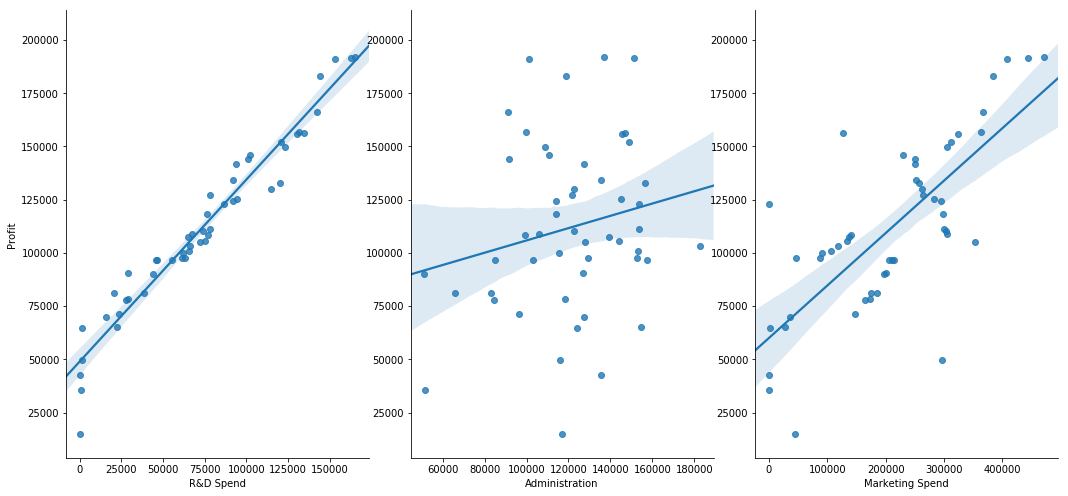

In [250]:
## know the scatter plot of each variable 
## plt.scatter(data=data_strt_up,x=data_strt_up.Profit,y=data_strt_up.Administration,c="green")
# plt.show()
# plt.scatter(data=data_strt_up,x=data_strt_up.Profit,y=data_strt_up['Marketing Spend'],c="Red")
# plt.show()
# plt.scatter(data=data_strt_up,x=data_strt_up.Profit,y=data_strt_up['R&D Spend'],c='Blue')
# plt.show()
## comment multiple line 'ctr+/'
## we can plot using seaborn perfectly to se the dependencies of these variables
%matplotlib inline 
## to appear the graph in the notebook 
sns.pairplot(data=data_strt_up,x_vars=['R&D Spend','Administration','Marketing Spend'],y_vars='Profit',size=7,aspect=0.7,kind='reg')


In [280]:
## from sklearn.linear_model import LinearRegression
## from sklearn.cross_validation import train_test_split
## prepare train test split data
## import the model fro scikit learn
## instantiate the mode
## filt the mode
## predict 
## rememebe the X in data split should be data fram aand the Y should be of list
## import sklearn.metrics
model_Linear_regression = LinearRegression()
X_strt = data_strt_up[['R&D Spend','Administration','Marketing Spend']]
#print(X_strt)
Y_strt = data_strt_up['Profit']
# print(Y_strt)
# print(X_train_strt.size)
# print(Y_strt.size)
# print(X_train_strt.size)
# print(y_train_strt.size)
X_train_strt,X_test_srtr,y_train_strt,y_test_strt = train_test_split(X_strt,Y_strt,random_state=1)
model_Linear_regression.fit(X_train_strt,y_train_strt)
print(model_Linear_regression.coef_)
print(model_Linear_regression.intercept_)
y_pred_strt = model_Linear_regression.predict(X_test_srtr)
strt_root_mean_sqr_Error = np.sqrt(metrics.mean_squared_error(y_test_strt,y_pred_strt))
print(strt_root_mean_sqr_Error)
## note put roor mean squre doesnt have any limit to be a good or bad 
## it all depend on the range of the data we have 
## if we had a data ranging from 1-10 we would have a good rmse of 1.5 to 2.0 but as the 
## data range in here is nore than 200000 so a rmse of '8208.37873976' is decent 

[ 0.76441049 -0.00112563  0.03278723]
49045.0661643
8208.37873976


In [304]:
##y_st=pd.DataFrame(y_test_strt,y_pred_strt)
print(y_test_strt)
print(y_pred_strt)
model_Linear_regression.

SyntaxError: invalid syntax (<ipython-input-304-6e790eed345a>, line 4)

# example 3 with stat model  stat model

In [2]:
## linear exapmle 3 
## boston price
boston_data = pd.read_csv("Boston.csv",header=0,index_col=0)
sns.pairplot(data=boston_data,x_vars=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat'],y_vars='medv',
            aspect=0.7,size=7)

In [335]:
boston_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [322]:
## from statsmodels.formula.api import ols
## line_boston_stat=smapi.ols(data=boston_data,formula="medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat").fit()
## line_boston_stat=smapi.ols(data=boston_data,formula="medv~crim+zn+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat").fit()
line_boston_stat=smapi.ols(data=boston_data,formula="medv~crim+zn+chas+nox+rm+dis+rad+tax+ptratio+black+lstat").fit()
line_boston_stat.summary()
## as stat model is mostly used to analyse the data 
## here we see that p-value for indus and age is far more than 0.05 we can remove one by one and then rebuild our model
## so we have analused the age and indus are not much significant value so we remove them from model
## now all the p-values are less than 0.05 
## p- value is the strength of null hypothesis if it is more then there are more chances null hypothesis to be correct
## p- value =0 also means it is strongly significant (algorithm after rounding off it shows 0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 17 Apr 2018   Prob (F-statistic):          5.54e-137
Time:                        02:47:06   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
crim          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
zn             0.0458      0.014      3.390      0.001       0.019       0.072
chas           2.7187      0.854      3.183      0.002       1.040       4.397
nox          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
rm             3.8016      0.406      9.356      0.000       3.003       4.600
dis           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
rad            0.2996      0.063      4.726      0.000       0.175       0.424
tax           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
ptratio       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
black          0.0093      0.003      3.475      0.001       0.004       0.015
lstat         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [331]:
## linear regression example 3 by scikit learn
## from sklearn.linearmodel import linearregression
## from sklearn.cross_validation import train_test_split
## from sklean imoort meetrics
## PREPARE x AND Y AND train  test data
feature_columns = ['crim','zn','chas','nox','rm','dis','rad','tax','ptratio','black','lstat']
X_Boston = boston_data[feature_columns]
y_Boston=boston_data['medv']
## print(X.shape)
## print(y.shape)
## (506, 13) FOR FIT IN linear regressio n out inut should be like this shape
## (506,)

##model_boston = LinearRegression()
X_train_boston,X_test_boston,y_train_boston,y_test_boston = train_test_split(X_Boston,y_Boston,random_state=1)
linear_model_boston = LinearRegression()
linear_model_boston.fit(X_train_boston,y_train_boston)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [334]:
print(linear_model_boston.intercept_)
print(linear_model_boston.coef_)
y_pred = linear_model_boston.predict(X_test_boston)
rmse_boston = np.sqrt(metrics.mean_squared_error(y_test_boston,y_pred))
print(rmse_boston)

14.0253094576
[ -0.09988623   0.02185784   6.44164735 -11.75631016   6.01920497
  -1.306842     0.28856364  -0.01434289  -0.84741727   0.01685127
  -0.43735216]
3.98238874974


In [2]:
l = [1,2,3,12,0,22,5]

In [10]:
for i in range(20,10,-1):
    print(i)

20
19
18
17
16
15
14
13
12
11


In [6]:
boston_data.groupby('rad').medv.mean()
boston_data.groupby('rad').medv.agg(['count','min','max','mean'])

,count,min,max,mean
rad,,,,
1,20,11.9,50.0,24.365000
2,24,15.7,43.8,26.833333
3,38,14.4,50.0,27.928947
4,110,7.0,50.0,21.387273
5,115,11.8,50.0,25.706957
6,26,16.8,24.8,20.976923
7,17,17.6,42.8,27.105882
8,24,16.0,50.0,30.358333
24,132,5.0,50.0,16.403788
